## ФИНАЛЬНЫЙ ПРОЕКТ
 
## Мультиклассовая класификация текстов на примере отзывов пользователей

Был использован датасет с отзывами о разных бизнесах [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Каждое вхождение в этом датасете  -- это отзыв об определенной компании от определенного пользвателя

Столбец «stars» - это количество звезд (от 1 до 5), присвоенное рецензентом компании. (Чем выше звездочка, тем лучше.) Другими словами, это рейтинг компании человеком, написавшим отзыв.

В столбце «cool» указано количество «крутых» голосов, полученных этим обзором от других пользователей Yelp.

Все отзывы начинаются с 0 "cool" голосов, и количество "cool" голосов, которое может получить обзор, не ограничено. Другими словами, это рейтинг самого обзора, а не рейтинг бизнеса.

Столбцы «useful» и «funny» аналогичны столбцу «cool».

## Imports


In [1]:
# имппотируем библиотеки для исследоания дф
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#pip install -U seaborn

## Данные

**загрузим файл yelp.csv и установим его как дф с именем yelp.**

In [3]:
data=pd.read_csv("yelp.csv")

**Применим head, info , and describe методы на yelp**

In [4]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


Много ненужных столбцов, уберем их

In [5]:
data=data.drop(["business_id","date", "review_id", "type","user_id"], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stars   10000 non-null  int64 
 1   text    10000 non-null  object
 2   cool    10000 non-null  int64 
 3   useful  10000 non-null  int64 
 4   funny   10000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 390.8+ KB


In [7]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Создадим новую колонку "text length", в которую поместим количесто слов в каждом отзыве**

In [8]:
data["text length"]=data["text"].apply(len)

In [9]:
data.head(10)

,stars,text,cool,useful,funny,text length
0,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,5,I have no idea why some people give bad review...,0,0,0,1345
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469
5,4,"Quiessence is, simply put, beautiful. Full wi...",4,3,1,2094
6,5,Drop what you're doing and drive here. After I...,7,7,4,1565
7,4,"Luckily, I didn't have to travel far to make m...",0,1,0,274
8,4,Definitely come for Happy hour! Prices are ama...,0,0,0,349
9,5,Nobuo shows his unique talents with everything...,0,1,0,186


# EDA

Let's explore the data


**Используем FacetGrid из seaborn, чтобы создать 5 гистограмм длины текста на основе рейтинга**

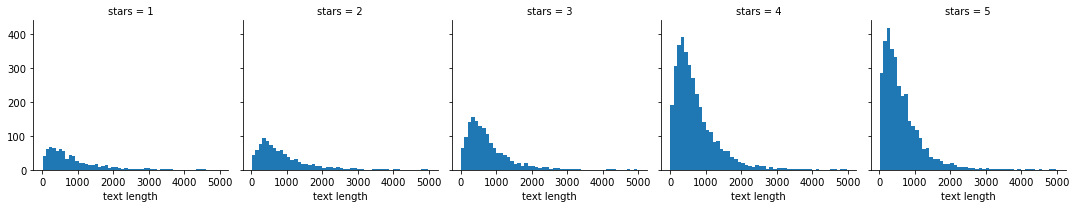

In [10]:
g=sns.FacetGrid(data=data, col="stars", )
g.map(plt.hist, "text length", bins=50)


Распределение более или менее одинаковое, но количество положительных отзывов растет по мере роста рейтинга

**Create a boxplot of text length for each star category.**

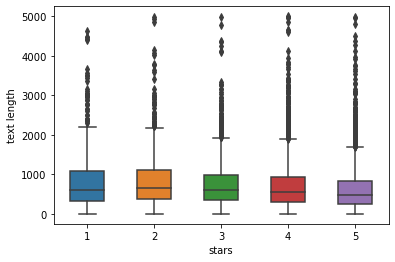

In [11]:
sns.boxplot(data=data, x="stars", y="text length", width=0.5)

**Создадим countplot с числом вхождений для каждой звезды**

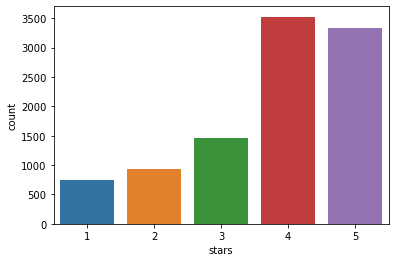

In [12]:
sns.countplot(data=data, x="stars")

Количество вхождений также было отражено в FacetGrid, здесь оно показано более наглядно

**Сгруппируем данные по рейтингу и посмотрим на среднюю длину  отзывов у каждой звезды**

In [13]:
data.groupby('stars').mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


Разброс между 2 и 1 звездами, между 3 и 4 звездами относительно несущественный

**Посмотрим на корелляцию данных**

In [14]:
data.groupby('stars').mean().corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Посмотрим на heatmap относительно .corr() метода:**

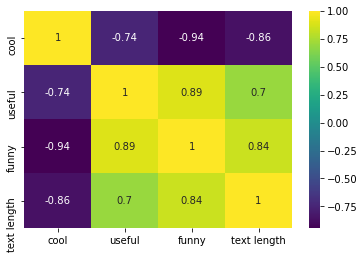

In [15]:
sns.heatmap(data.groupby('stars').mean().corr(), cmap="viridis", annot=True)

замечаем положительную корелляцию между useful и text length, а также между funny и text length
отрицательную между cool и text length, funny,  useful

## Классификация

**Уберем лишние столбцы, так как будем работать только со столбцами с текстом и рейтингом**

In [16]:
#Уберем лишние столбцы, так как будем работать только со столбцами с текстом и рейтингом
# сначала посмотрим, сможем ли мы классифицировать тексы на два самых полярных класса
data=data[["stars", "text"]]
yelp_class=data[(data.stars==1) | (data.stars==5)]

**импортируем различные модели МО, а также count vectorizer, tf-idf transformer, метрики оценки и тд**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

**создадим функцию препроцессинга - уберем пунктуацию, апперкейс, стопслова, а дальше посмотрим, нужна ли она**

In [18]:
import string
from nltk.corpus import stopwords
def text_process(text):
    nopunc=[char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc=[char.lower() for char in nopunc.split() if char.lower() not in stopwords.words("english")]
    return nopunc  

**сделаем привычные дейтвия перед МО**

In [19]:
X=yelp_class["text"]
y=yelp_class["stars"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**исопльзуем пайплайн обработки изначальных данных. В пайплайне очень удобно менять некоторые характеристики, смотря, какой вариант получается более эффективным. варианты пайплайна-с и без tfidf, с и без препроцессинга (аналайзера), две модели - MNNB, SGD(SVM)
посмотрим, кто лучше справляется**

**SGD, tfidf+, analyzer -**

In [21]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42,max_iter=60, tol=None))])


pipeline.fit(X_train,y_train)

predictions=pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, predictions))
print("\n")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

accuracy 0.8849918433931484


[[ 95 138]
 [  3 990]]
              precision    recall  f1-score   support

           1       0.97      0.41      0.57       233
           5       0.88      1.00      0.93       993

    accuracy                           0.88      1226
   macro avg       0.92      0.70      0.75      1226
weighted avg       0.90      0.88      0.87      1226



**SGD, tfidf-, analyzer -**

In [22]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    #('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42,max_iter=60, tol=None))])


pipeline.fit(X_train,y_train)

predictions=pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, predictions))

print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

accuracy 0.9290375203915171
[[182  51]
 [ 36 957]]


              precision    recall  f1-score   support

           1       0.83      0.78      0.81       233
           5       0.95      0.96      0.96       993

    accuracy                           0.93      1226
   macro avg       0.89      0.87      0.88      1226
weighted avg       0.93      0.93      0.93      1226



**SGD, tfidf+, analyzer +**

In [23]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts, analyzer
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42,max_iter=60, tol=None))])


pipeline.fit(X_train,y_train)

predictions=pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, predictions))

print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

accuracy 0.8727569331158238
[[ 77 156]
 [  0 993]]


              precision    recall  f1-score   support

           1       1.00      0.33      0.50       233
           5       0.86      1.00      0.93       993

    accuracy                           0.87      1226
   macro avg       0.93      0.67      0.71      1226
weighted avg       0.89      0.87      0.85      1226



**SGD, tfidf-, analyzer +**

In [24]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts, analyzer
    #('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42,max_iter=60, tol=None))])


pipeline.fit(X_train,y_train)

predictions=pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, predictions))

print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

accuracy 0.9110929853181077
[[161  72]
 [ 37 956]]


              precision    recall  f1-score   support

           1       0.81      0.69      0.75       233
           5       0.93      0.96      0.95       993

    accuracy                           0.91      1226
   macro avg       0.87      0.83      0.85      1226
weighted avg       0.91      0.91      0.91      1226



**MNNB, tfidf+, analyzer +**

In [25]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts, analyzer
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB())])


pipeline.fit(X_train,y_train)

predictions=pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, predictions))

print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

accuracy 0.8115823817292006
[[  2 231]
 [  0 993]]


              precision    recall  f1-score   support

           1       1.00      0.01      0.02       233
           5       0.81      1.00      0.90       993

    accuracy                           0.81      1226
   macro avg       0.91      0.50      0.46      1226
weighted avg       0.85      0.81      0.73      1226



**MNNB, tfidf+, analyzer-**

In [26]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts, analyzer
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB())])


pipeline.fit(X_train,y_train)

predictions=pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, predictions))

print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

accuracy 0.8107667210440457
[[  1 232]
 [  0 993]]


              precision    recall  f1-score   support

           1       1.00      0.00      0.01       233
           5       0.81      1.00      0.90       993

    accuracy                           0.81      1226
   macro avg       0.91      0.50      0.45      1226
weighted avg       0.85      0.81      0.73      1226



**MNNB, tfidf-, analyzer-**

In [27]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts, analyzer
    #('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB())])


pipeline.fit(X_train,y_train)

predictions=pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, predictions))

print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

accuracy 0.9110929853181077
[[149  84]
 [ 25 968]]


              precision    recall  f1-score   support

           1       0.86      0.64      0.73       233
           5       0.92      0.97      0.95       993

    accuracy                           0.91      1226
   macro avg       0.89      0.81      0.84      1226
weighted avg       0.91      0.91      0.91      1226



**MNNB, tfidf-, analyzer+**

In [28]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts, analyzer
    #('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB())])


pipeline.fit(X_train,y_train)

predictions=pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, predictions))

print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

accuracy 0.9119086460032626
[[143  90]
 [ 18 975]]


              precision    recall  f1-score   support

           1       0.89      0.61      0.73       233
           5       0.92      0.98      0.95       993

    accuracy                           0.91      1226
   macro avg       0.90      0.80      0.84      1226
weighted avg       0.91      0.91      0.91      1226



**пробные варианты**

In [51]:
yelp_class=data[(data.stars==1) | (data.stars==5)| (data.stars==3)]

In [52]:
X=yelp_class["text"]
y=yelp_class["stars"]


In [34]:
from imblearn.over_sampling import SMOTE

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
X=CountVectorizer().fit_transform(X)

In [44]:
from imblearn.over_sampling import SMOTE

In [55]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print("Accuracy %s" % accuracy_score(pred_sgd,y_test))

print(confusion_matrix(y_test,pred_sgd))
print(classification_report(y_test,pred_sgd))

Accuracy 0.8115845539280959
[[908  52  25]
 [196 698 140]
 [ 51 102 832]]
              precision    recall  f1-score   support

           1       0.79      0.92      0.85       985
           3       0.82      0.68      0.74      1034
           5       0.83      0.84      0.84       985

    accuracy                           0.81      3004
   macro avg       0.81      0.81      0.81      3004
weighted avg       0.81      0.81      0.81      3004



**word2vec with gensim**

In [239]:
import re 
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
STOPWORDS = set(stopwords.words('english'))
from gensim.models import Word2Vec

df = pd.read_csv("yelp.csv", dtype="string")

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove a sentence if it is only one word long
    if len(text) > 2:
        return ' '.join(word for word in text.split() if word not in STOPWORDS)

df_clean = pd.DataFrame(df.text.apply(lambda x: clean_text(x)), dtype="object")


In [240]:
df_clean["stars"]=df["stars"]

df_clean

,text,stars
0,wife took birthday breakfast excellent weather...,5
1,idea people give bad reviews place goes show p...,5
2,love gyro plate rice good also dig candy selec...,4
3,rosie dakota love chaparral dog park convenien...,5
4,general manager scott petello good egg go deta...,5
...,...,...
9995,first visithad lunch today used groupon ordere...,3
9996,called house deliciousness could go item item ...,4
9997,recently visited olive ivy business last week ...,4
9998,nephew moved scottsdale recently bunch friends...,2


In [241]:
df_clean=df_clean.dropna()
df_clean

,text,stars
0,wife took birthday breakfast excellent weather...,5
1,idea people give bad reviews place goes show p...,5
2,love gyro plate rice good also dig candy selec...,4
3,rosie dakota love chaparral dog park convenien...,5
4,general manager scott petello good egg go deta...,5
...,...,...
9995,first visithad lunch today used groupon ordere...,3
9996,called house deliciousness could go item item ...,4
9997,recently visited olive ivy business last week ...,4
9998,nephew moved scottsdale recently bunch friends...,2


In [242]:
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

df_clean["text_lemmatize"] =  df_clean.apply(lambda x: lemmatizer(x['text']), axis=1)
df_clean['text_lemmatize_clean'] = df_clean['text_lemmatize'].str.replace('-PRON-', '')

<ipython-input-242-22891c37f122>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["text_lemmatize"] =  df_clean.apply(lambda x: lemmatizer(x['text']), axis=1)
<ipython-input-242-22891c37f122>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_lemmatize_clean'] = df_clean['text_lemmatize'].str.replace('-PRON-', '')


In [243]:
#trial
df_clean['text_lemmatize_clean'] = pd.DataFrame(df.text.apply(lambda x: clean_text(x)), dtype="object")

<ipython-input-243-f653b836254c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_lemmatize_clean'] = pd.DataFrame(df.text.apply(lambda x: clean_text(x)), dtype="object")


In [245]:
sentences = [row.split() for row in df_clean['text_lemmatize_clean']]
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
        
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['good',
 'place',
 'food',
 'great',
 'like',
 'one',
 'get',
 'time',
 'go',
 'really']

In [246]:
w2v_model = Word2Vec(min_count=200,
                     window=5,
                     size=100,
                     workers=4)
                     
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)
w2v_model.init_sims(replace=True)

<ipython-input-246-4acd9ace9c96>:7: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)


In [251]:
w2v_model.wv.most_similar(positive=['wife'])

[('husband', 0.9620386362075806),
 ('ate', 0.9278019666671753),
 ('friend', 0.8709032535552979),
 ('ordered', 0.838584303855896),
 ('got', 0.8231695294380188),
 ('started', 0.8112983703613281),
 ('came', 0.7765061855316162),
 ('bite', 0.7729781866073608),
 ('mom', 0.7642212510108948),
 ('steak', 0.7625998854637146)]

In [248]:
word = "say"
w2v_model[word].shape

<ipython-input-248-9042cd6a5530>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  w2v_model[word].shape


(100,)

<ipython-input-250-e63edf4fd024>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


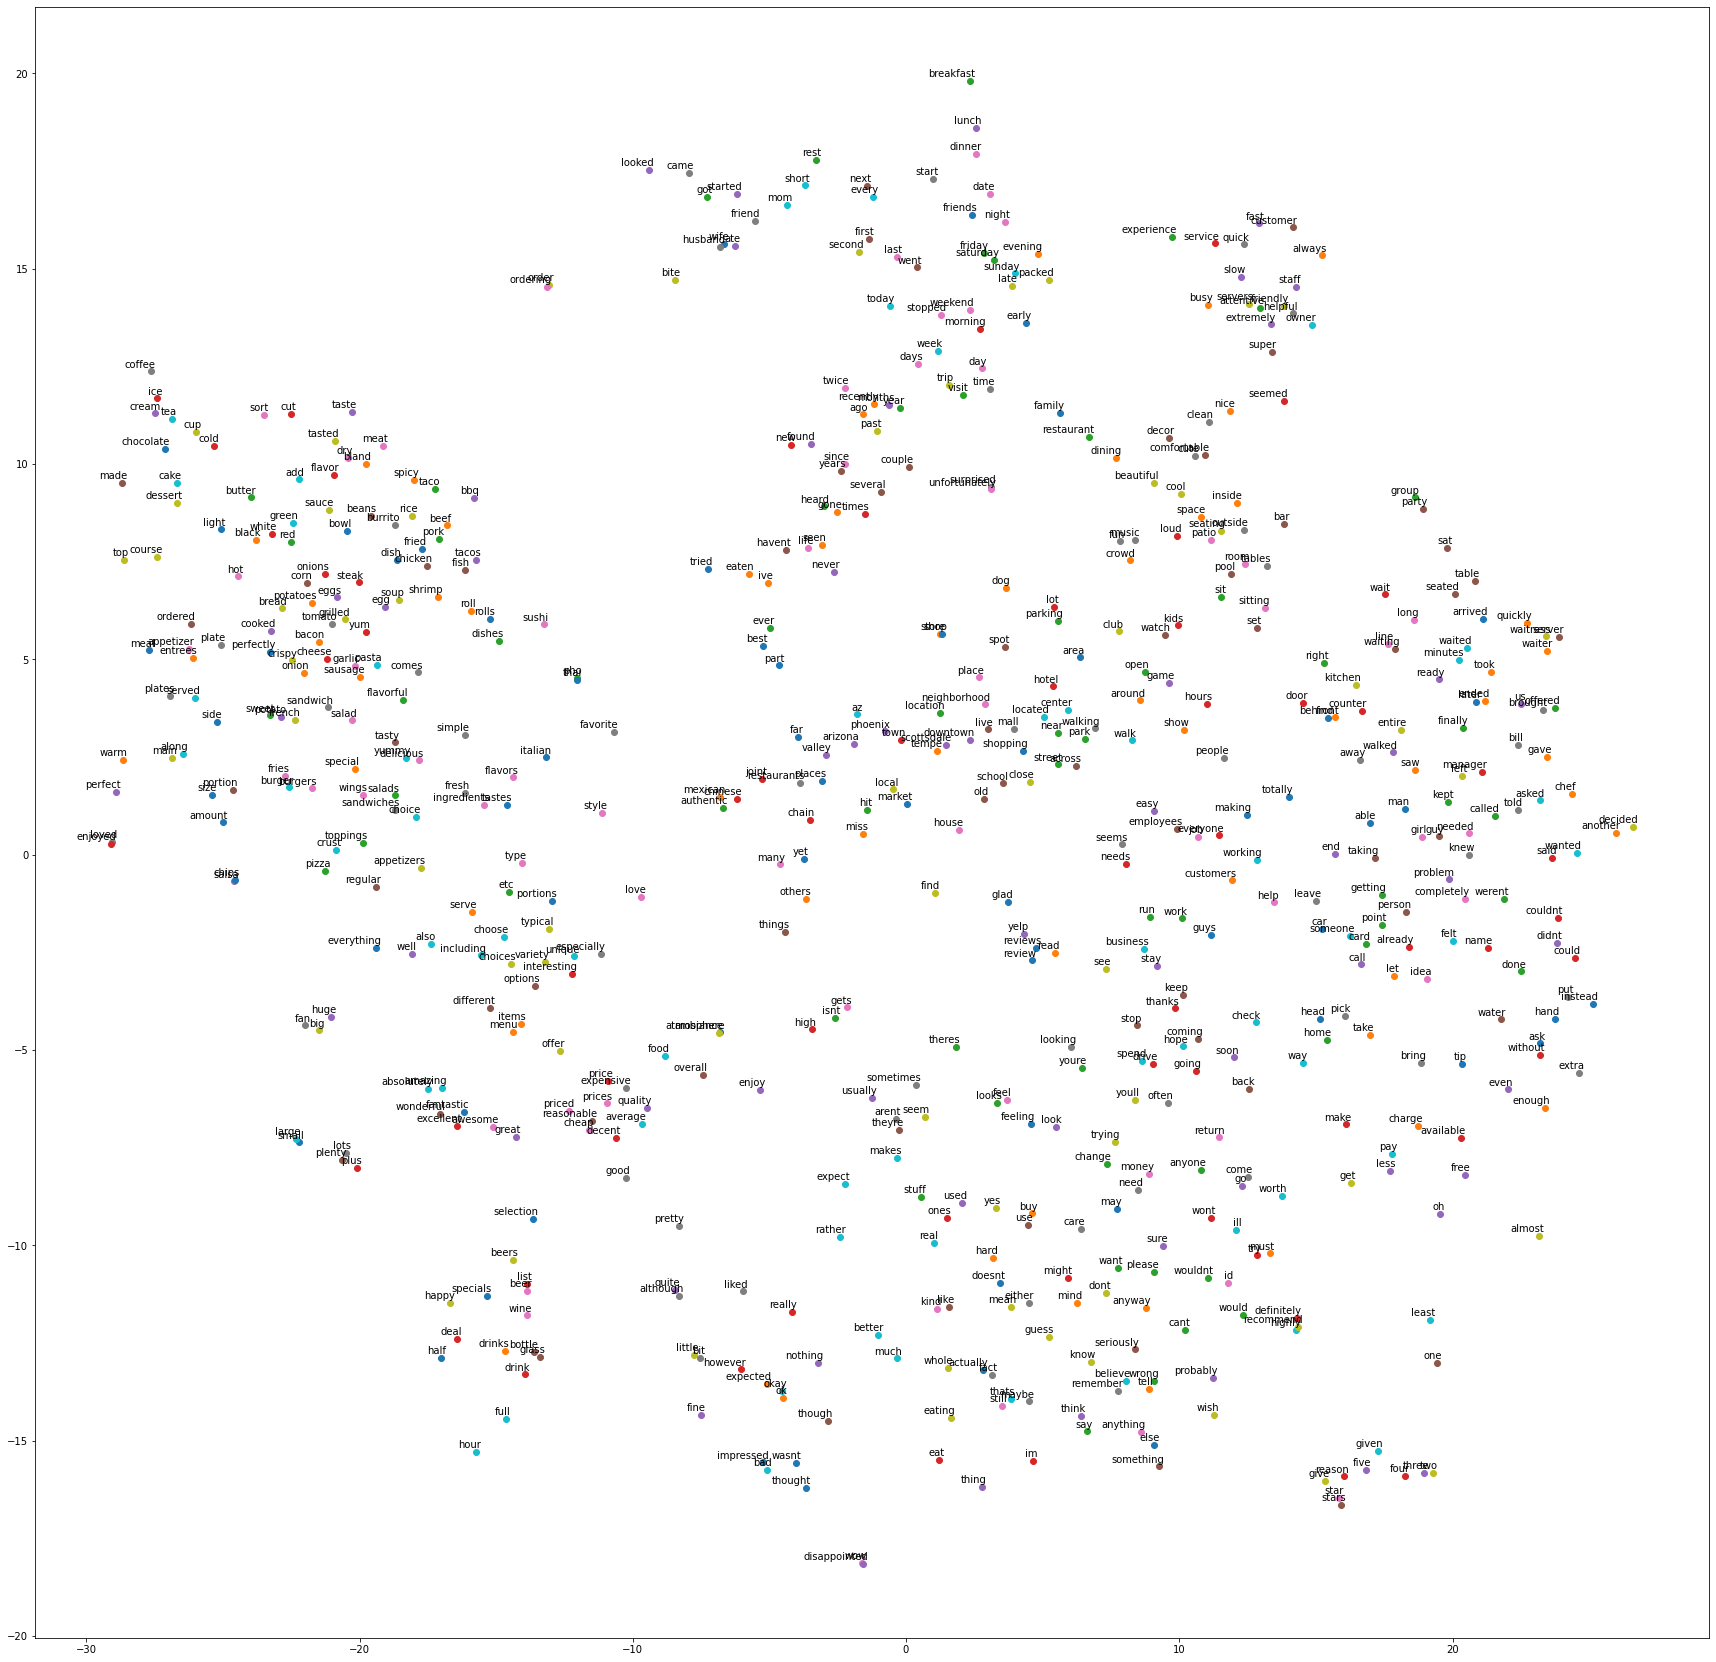

In [250]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(30, 30)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
   
tsne_plot(w2v_model)


In [187]:

## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## tokenize text
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(sentences)
dic_vocabulary = tokenizer.word_index
## create sequence
lst_text2seq= tokenizer.texts_to_sequences(sentences)
## padding sequence
X= kprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=15, padding="post", truncating="post")

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [195]:
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
print("Accuracy %s" % accuracy_score(pred_sgd,y_test))

print(confusion_matrix(y_test,pred_sgd))
print(classification_report(y_test,pred_sgd))

Accuracy 0.30366666666666664
[[ 11   1  27  78  91]
 [  9   0  23 114 128]
 [ 21   0  58 166 210]
 [ 68   0 120 391 516]
 [ 40   3 113 361 451]]
              precision    recall  f1-score   support

           1       0.07      0.05      0.06       208
           2       0.00      0.00      0.00       274
           3       0.17      0.13      0.15       455
           4       0.35      0.36      0.35      1095
           5       0.32      0.47      0.38       968

    accuracy                           0.30      3000
   macro avg       0.18      0.20      0.19      3000
weighted avg       0.26      0.30      0.28      3000

